# TP Apprentissage supervisé: Régression
Dans ce TP, on va faire la regression. C'est pour analyser la relation d'une variable par rapport à une ou plusieurs autres.

## Dataset

On va utiliser les données Boston.
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Prix des maisons à Boston (cf le site pour les variables)
https://scikit-learn.org/stable/datasets/index.html#boston-dataset

Importez les libraries de ce matin: `numpy` et `scikit datasets`.
Consultation de la doc du dataset

Chargement du dataset boston

In [1]:
import numpy as np 
from sklearn import datasets
boston = datasets.load_boston()
X, y = boston.data, boston.target
feature_names = boston.feature_names

## Analyse exploratoire et préparation du dataset
Étudier les corrélations en utilisant `np.corrcoef`

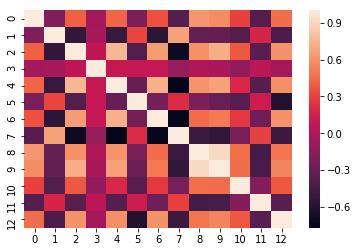

In [22]:
import seaborn as sns
sns.heatmap(np.corrcoef(X.T))

In [23]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Split du dataset boston

Pour cela, utilisez la fonction scikit-learn `sklearn.model_selection.train_test_split`. Importez cette méthode, 

In [7]:
from sklearn.model_selection import train_test_split
X_tv,X_test,y_tv,y_test = train_test_split(X,y,test_size=.2)
X_train,X_validation,y_train,y_validation = train_test_split(X_tv,y_tv,test_size=.25)

## Linear regression
Modèle classique, assez peu puissant et interprétable. Basée sur la Mean Square Error. Très sensible au outliers.

![](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

Trouver le modèle sur scikit learn.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
pred = linreg.predict(X_validation)
mse = mean_squared_error(y_pred=pred,y_true=y_validation)

In [19]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [16]:
linreg.intercept_

39.481226596127605

In [17]:
linreg.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

Run sur boston. afficher les coef de chaque features. Quelles features sont significative?

In [27]:
linreg.coef_

array([-1.14234728e-01,  5.55923762e-02,  2.55592631e-02,  2.86592242e+00,
       -1.71089986e+01,  3.53718449e+00, -2.04686250e-03, -1.74720480e+00,
        3.56702414e-01, -1.39014036e-02, -9.66897760e-01,  1.20770497e-02,
       -5.98533043e-01])

In [30]:
mse

23.984703524807863

In [53]:
pred = linreg.predict(X_test)
mse_linreg = mean_squared_error(y_pred=pred,y_true=y_test)
mse_linreg

17.305306709963975

ValueError: Expected 2D array, got scalar array instead:
array=0.007248.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

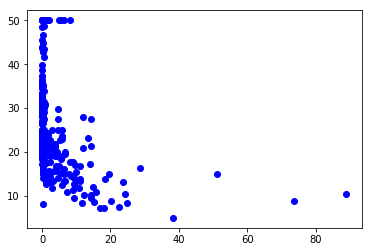

In [55]:
from mlxtend.plotting import plot_linear_regression
intercept, slope, corr_coeff = plot_linear_regression(X_train[:,0], np.array(y_train))
plt.show()
y_train

## Arbre de régression
![](https://i0.wp.com/freakonometrics.hypotheses.org/files/2015/06/boosting-algo-3.gif?zoom=2&w=456&ssl=1)

Les arbres de régression sont des modèles très puissants, qui divisent l'espace en zone où tout les points ont le même output. On trouvera dans scikit: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [25]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt

In [26]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG


def visualize_tree(clf):
    dotefile_string = export_graphviz(clf, out_file=None,feature_names=feature_names)
    graph = Source(dotefile_string)
    return SVG(graph.pipe('svg'))

Essayer avec une profondeur max de 3

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree_3 = DecisionTreeRegressor(max_depth=3)
tree_3.fit(X_train,y_train)
pred = tree_3.predict(X_validation)
mse_tree = mean_squared_error(y_pred=pred,y_true=y_validation)
mse_tree

23.16271238111014

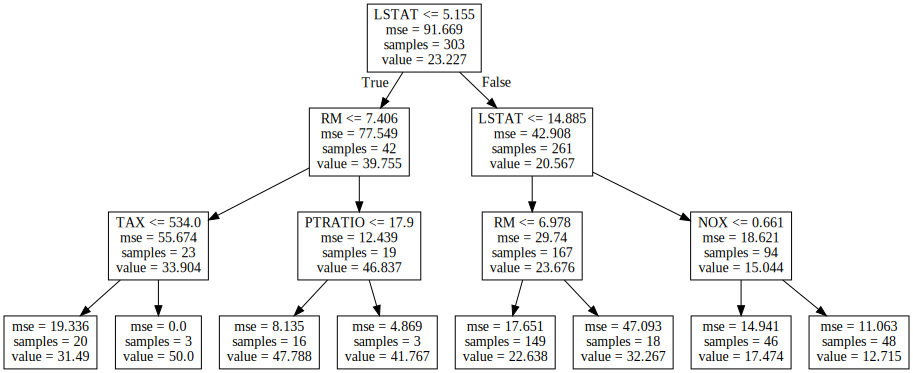

In [38]:
visualize_tree(tree_3)

Essayer avec une profondeur max de 5

In [60]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train,y_train)
pred = tree.predict(X_validation)
mse_tree = mean_squared_error(y_pred=pred,y_true=y_validation)
mse_tree

15.383911132931058

Essayer avec une profondeur max de 10

In [81]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train,y_train)
pred = tree.predict(X_validation)
mse_tree = mean_squared_error(y_pred=pred,y_true=y_validation)
mse_tree


15.935984288699112

In [79]:
tree = DecisionTreeRegressor(max_depth=50)
tree.fit(X_train,y_train)
pred = tree.predict(X_validation)
mse_tree = mean_squared_error(y_pred=pred,y_true=y_validation)
mse_tree

16.040198019801984

In [84]:
%timeit tree = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
%timeit tree = DecisionTreeRegressor(max_depth=50).fit(X_train,y_train)
%timeit tree = DecisionTreeRegressor(max_depth=100).fit(X_train,y_train)

1.09 ms ± 52.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.22 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.15 ms ± 15.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Comparer les résultats

In [ ]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train,y_train)
pred = tree.predict(X_validation)
mse_tree = mean_squared_error(y_pred=pred,y_true=y_validation)
mse_tree

## Random forest
Trouver sur scikit
image
modèle

In [56]:
from sklearn.ensemble import RandomForestRegressor

Essayer avec 3 arbres

In [57]:
clf = RandomForestRegressor(n_estimators=3)
clf.fit(X_train,y_train)
pred = clf.predict(X_validation)
mean_squared_error(pred,y_validation)

16.73265126512651

Essayer avec 10 arbres

In [58]:
clf = RandomForestRegressor(n_estimators=10)
clf.fit(X_train,y_train)
pred = clf.predict(X_validation)
mean_squared_error(pred,y_validation)

9.328624752475244

100 arbres

In [91]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)
pred = clf.predict(X_validation)
mean_squared_error(pred,y_validation)

9.36942520792078

Comparer avec les arbres de régression. Quels sont les avantages?

_optionel_ Tracer le résultat avec 1 arbre, 3 arbres et 100 arbres 

## Si vous vous ennuyez
Comparer les différents modèles, en lançant tout ça su le test

Faire une régression sur le résultat d'une PCA (touchy)
